In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data19=pd.read_csv("data19_only.csv",encoding='CP949')

In [3]:
data19.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,201905,할인점,1,F,3,1,2,2,2,2
1,201905,할인점,1,G,3,1,3,2,2,2
2,201905,할인점,0,C,2,2,3,1,1,1
3,201905,할인점,1,D,2,2,2,2,1,2
4,201905,할인점,1,F,3,1,2,2,2,3


In [4]:
#성별 포함시킬지 아닐지? 전업주부 스코어 포함시킬지?
temp_data19=pd.DataFrame(data19,columns=["기혼스코어","유아자녀스코어","초등학생자녀스코어","중고생자녀스코어","대학생자녀스코어","전업주부스코어"])

In [5]:
temp_data19.head()

,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,3,1,2,2,2,2
1,3,1,3,2,2,2
2,2,2,3,1,1,1
3,2,2,2,2,1,2
4,3,1,2,2,2,3


In [3]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=1000,random_state=0)
kmeans.fit(temp_data19)

In [8]:
data19['cluster']=kmeans.labels_
result_19=data19.groupby(['연령대','cluster'])['연령대'].count()
print(result_19)

연령대  cluster
A    0          3503
     1          3809
     2          2186
B    0          4941
     2           865
C    1          5604
     2           634
D    0           153
     1          7759
     2          2108
E    2          4462
F    0          8104
     1           413
     2           906
G    0          6723
     2           510
H    2          7621
Name: 연령대, dtype: int64


In [9]:
data20=pd.read_csv("data20_only.csv",encoding='CP949')

In [10]:
temp_data20=pd.DataFrame(data20,columns=["기혼스코어","유아자녀스코어","초등학생자녀스코어","중고생자녀스코어","대학생자녀스코어","전업주부스코어"])

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=1000,random_state=0)
kmeans.fit(temp_data20)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [12]:
data20['cluster']=kmeans.labels_
result_20=data20.groupby(['연령대','cluster'])['연령대'].count()

In [13]:
print(result_19)

연령대  cluster
A    0          3503
     1          3809
     2          2186
B    0          4941
     2           865
C    1          5604
     2           634
D    0           153
     1          7759
     2          2108
E    2          4462
F    0          8104
     1           413
     2           906
G    0          6723
     2           510
H    2          7621
Name: 연령대, dtype: int64


In [14]:
print(result_20)

연령대  cluster
A    0          1596
     1          1472
     2          3565
B    1          3697
     2            27
C    0          3950
     1            33
     2           136
D    0          4659
     1            50
     2          1623
E    0          2524
     2           209
F    0           160
     1          4569
     2          1858
G    1          4882
     2           245
H    2          5199
Name: 연령대, dtype: int64


In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
temp_data19.head()

,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,3,1,2,2,2,2
1,3,1,3,2,2,2
2,2,2,3,1,1,1
3,2,2,2,2,1,2
4,3,1,2,2,2,3


In [17]:
data19.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,cluster
0,201905,할인점,1,F,3,1,2,2,2,2,0
1,201905,할인점,1,G,3,1,3,2,2,2,0
2,201905,할인점,0,C,2,2,3,1,1,1,1
3,201905,할인점,1,D,2,2,2,2,1,2,1
4,201905,할인점,1,F,3,1,2,2,2,3,0


In [60]:
score_samples=silhouette_samples(temp_data19,data19['cluster'])
data19['silhouette_coeff']=score_samples

In [62]:
average_score = silhouette_score(temp_data19, data19['cluster'])
print('19년도 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
data19.groupby('cluster')['silhouette_coeff'].mean()

19년도 데이터셋 Silhouette Analysis Score:0.266


cluster
0    0.322409
1    0.205781
2    0.251355
Name: silhouette_coeff, dtype: float64

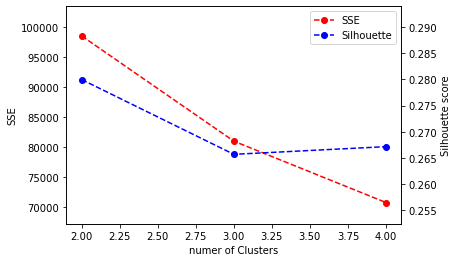

In [69]:
wss = [] 
sis = [] 
for k in range(2,8): 
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(temp_data19) 
    wss = np.append(wss, kmeans.inertia_)
    sis = np.append(sis, silhouette_score(temp_data19, kmeans.labels_)) 

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

line1 = ax1.plot(np.arange(2,5), wss, 'ro--', label='SSE') 
line2 = ax2.plot(np.arange(2,5), sis, 'bo--', label='Silhouette') 

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05) 
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05) 

ax1.set_xlabel('numer of Clusters')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()

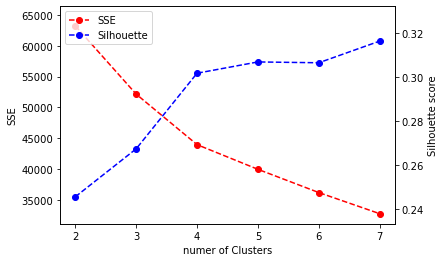

In [70]:
wss = [] 
sis = [] 
for k in range(2,8): 
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(temp_data20) 
    wss = np.append(wss, kmeans.inertia_)
    sis = np.append(sis, silhouette_score(temp_data20, kmeans.labels_)) 

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

line1 = ax1.plot(np.arange(2,8), wss, 'ro--', label='SSE') 
line2 = ax2.plot(np.arange(2,8), sis, 'bo--', label='Silhouette') 

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05) 
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05) 

ax1.set_xlabel('numer of Clusters')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()

In [5]:
def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs 
    from sklearn.cluster import KMeans 
    from sklearn.metrics import silhouette_samples, silhouette_score 
    
    import matplotlib.pyplot as plt 
    import matplotlib.cm as cm 
    import math 
    
    n_cols = len(cluster_lists)
    
    fig, axs=plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+str(n_cluster)+'\n' \
                           'Silhouette Score :' +str(round(sil_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values") 
        axs[ind].set_ylabel("Cluster label") 
        axs[ind].set_xlim([-0.1, 1]) 
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10]) 
        axs[ind].set_yticks([]) 
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1]) 
        
        for i in range(n_cluster): 
            ith_cluster_sil_values = sil_values[cluster_labels==i] 
            ith_cluster_sil_values.sort() 
            
            size_cluster_i = ith_cluster_sil_values.shape[0] 
            y_upper = y_lower + size_cluster_i 
            
            color = cm.nipy_spectral(float(i) / n_cluster) 
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                       facecolor=color, edgecolor=color, alpha=0.7) 
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 
            y_lower = y_upper + 10 

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--") 

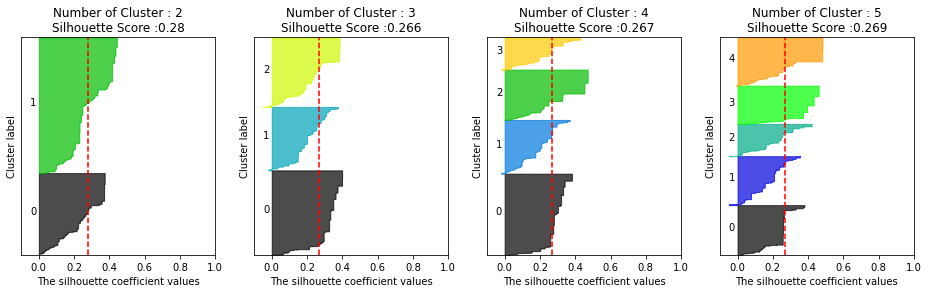

In [74]:
visualize_silhouette([2,3,4,5],temp_data19)

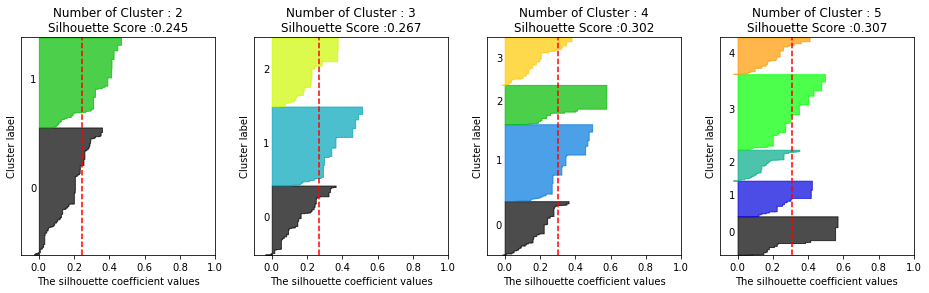

In [75]:
visualize_silhouette([2,3,4,5],temp_data20)

In [6]:
data=pd.read_csv("data_numbers.csv",encoding='CP949')

In [7]:
data.head()

,Unnamed: 0,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,0,202005,할인점,0,F,3,1,3,2,1,1
1,1,202005,취미,0,B,3,1,2,2,1,1
2,2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2
3,3,202005,뷰티,0,D,2,2,2,2,1,1
4,4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1


In [8]:
#성별 포함시킬지 아닐지? 전업주부 스코어 포함시킬지?
temp_data=pd.DataFrame(data,columns=["기혼스코어","유아자녀스코어","초등학생자녀스코어","중고생자녀스코어","대학생자녀스코어","전업주부스코어"])

2
3
4


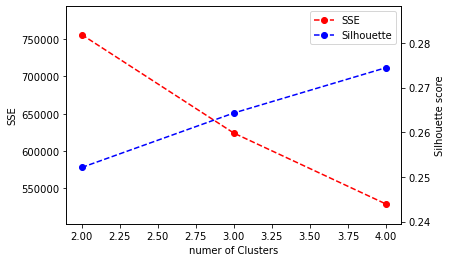

In [9]:
import matplotlib.pyplot as plt
wss = [] 
sis = [] 
for k in range(2,5): 
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(temp_data) 
    wss = np.append(wss, kmeans.inertia_)
    sis = np.append(sis, silhouette_score(temp_data, kmeans.labels_)) 

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

line1 = ax1.plot(np.arange(2,5), wss, 'ro--', label='SSE') 
line2 = ax2.plot(np.arange(2,5), sis, 'bo--', label='Silhouette') 

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05) 
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05) 

ax1.set_xlabel('numer of Clusters')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()

KeyboardInterrupt: 

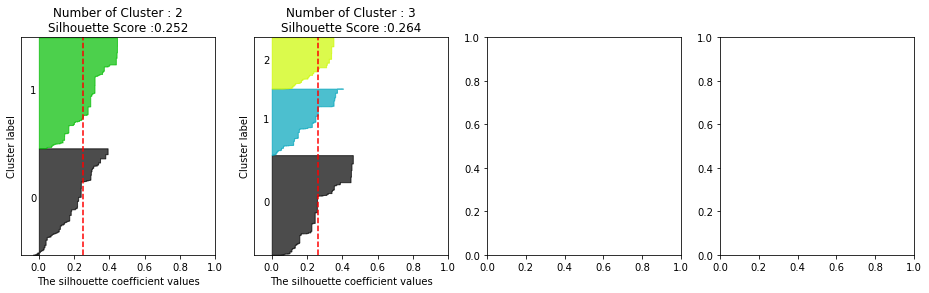

In [10]:
visualize_silhouette([2,3,4,5],temp_data)

In [20]:
data19=pd.read_csv("data_2019.csv",encoding='CP949')
data20=pd.read_csv("data_2020.csv",encoding='CP949')
data=pd.concat([data19,data20])
temp_data=pd.DataFrame(data,columns=["기혼스코어",\
"유아자녀스코어","초등학생자녀스코어",\
"중고생자녀스코어","대학생자녀스코어","전업주부스코어"])

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=1000\
              ,random_state=0)
kmeans.fit(temp_data)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [22]:
data['cluster']=kmeans.labels_
result=data.groupby(['연령대','cluster'])['연령대'].count()
print(result)

연령대  cluster
A    0          29189
     1          41692
     2            759
B    0           2359
     1          32666
C    0           1018
     1           2190
     2          53062
D    0          16952
     1          27370
     2          31850
E    0           1991
     2          52583
F    0          14745
     1          55406
G    0           3211
     1          47884
H    0          37111
Name: 연령대, dtype: int64
